# Исследование объявлений о продаже квартир

## Общая информация

Данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Необходимо научиться определять рыночную стоимость объектов недвижимости. Задача проекта  — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Описание данных**
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

In [407]:
# Импорты
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [408]:
# Настройки
pd.set_option('display.max_columns', None)

In [409]:
# Чтение датасета и приведение названий столбцов в порядок
try:
    original_df = pd.read_csv('datasets/real_estate_data.csv', sep='\t') # локальная версия
except:
    original_df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # тетрадь в Практикуме

original_df.columns = ['total_images', 'last_price', 'total_area', 'first_day_exposition',
                       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
                       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
                       'locality_name', 'airports_nearest', 'city_centers_nearest',
                       'parks_around_three_km', 'parks_nearest', 'ponds_around_three_km',
                       'ponds_nearest', 'days_exposition']

### Первоначальные данные

In [410]:
original_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_three_km,parks_nearest,ponds_around_three_km,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [411]:
original_df.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_three_km,parks_nearest,ponds_around_three_km,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [412]:
original_df.shape

(23699, 22)

In [413]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_images           23699 non-null  int64  
 1   last_price             23699 non-null  float64
 2   total_area             23699 non-null  float64
 3   first_day_exposition   23699 non-null  object 
 4   rooms                  23699 non-null  int64  
 5   ceiling_height         14504 non-null  float64
 6   floors_total           23613 non-null  float64
 7   living_area            21796 non-null  float64
 8   floor                  23699 non-null  int64  
 9   is_apartment           2775 non-null   object 
 10  studio                 23699 non-null  bool   
 11  open_plan              23699 non-null  bool   
 12  kitchen_area           21421 non-null  float64
 13  balcony                12180 non-null  float64
 14  locality_name          23650 non-null  object 
 15  ai

**Необходимо преобразовать типы:**
- first_day_exposition - в дату (время везде 00:00:00)
- floors_total, balcony, parks_around_three_km, ponds_around_three_km, days_exposition - в инт (необходимо разобраться почему не сработала автоматика)
- is_apartment - в булеву переменную (необходимо разобраться почему не сработала автоматика)

In [414]:
# Пропуски в абсолютных и относительных величинах
display(original_df.isna().sum().sort_values(ascending=False))
original_df.isna().mean().sort_values(ascending=False).apply(lambda x: format(x, ".1%"))

is_apartment             20924
parks_nearest            15620
ponds_nearest            14589
balcony                  11519
ceiling_height            9195
airports_nearest          5542
city_centers_nearest      5519
ponds_around_three_km     5518
parks_around_three_km     5518
days_exposition           3181
kitchen_area              2278
living_area               1903
floors_total                86
locality_name               49
total_images                 0
last_price                   0
studio                       0
floor                        0
rooms                        0
first_day_exposition         0
total_area                   0
open_plan                    0
dtype: int64

is_apartment             88.3%
parks_nearest            65.9%
ponds_nearest            61.6%
balcony                  48.6%
ceiling_height           38.8%
airports_nearest         23.4%
city_centers_nearest     23.3%
ponds_around_three_km    23.3%
parks_around_three_km    23.3%
days_exposition          13.4%
kitchen_area              9.6%
living_area               8.0%
floors_total              0.4%
locality_name             0.2%
total_images              0.0%
last_price                0.0%
studio                    0.0%
floor                     0.0%
rooms                     0.0%
first_day_exposition      0.0%
total_area                0.0%
open_plan                 0.0%
dtype: object

Большая часть столбцов имеет пропуски. Доля пропусков в is_apartment достигает почти 90%.

In [415]:
# Дубликаты
original_df.duplicated().sum()

0

Прямых дубликатов в данных нет.

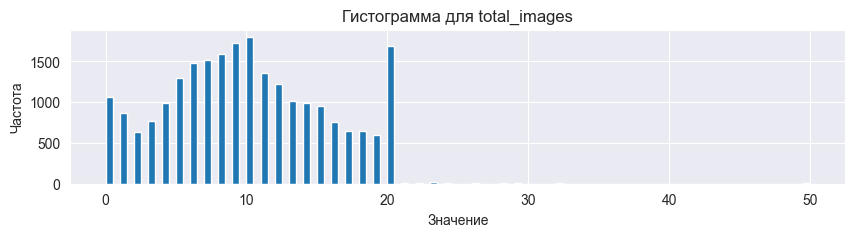

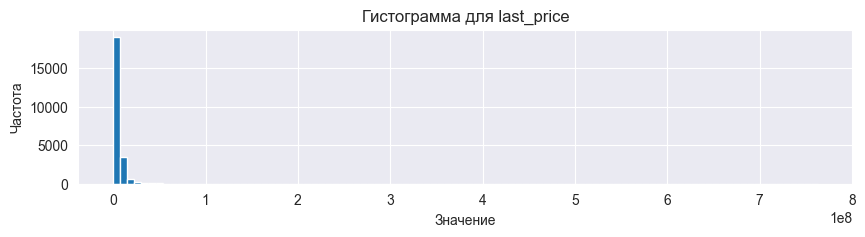

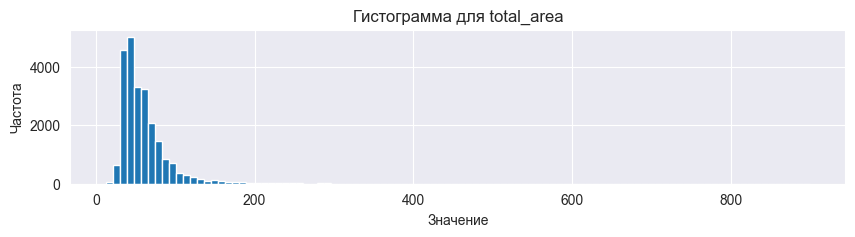

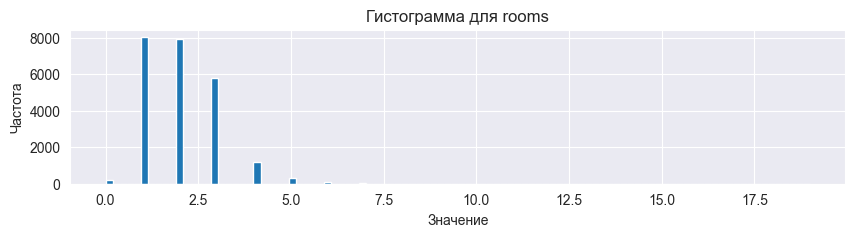

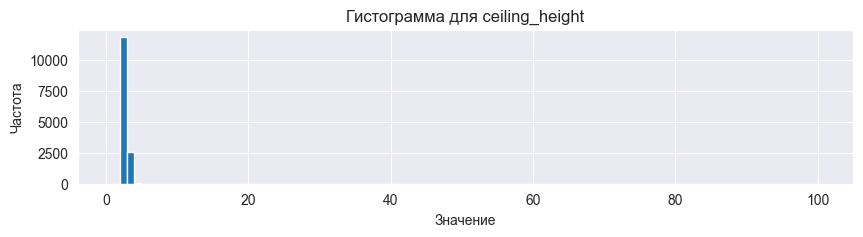

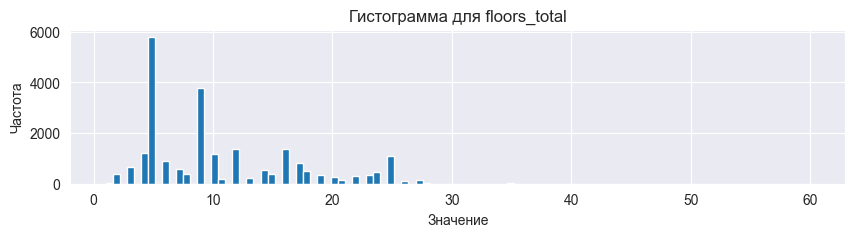

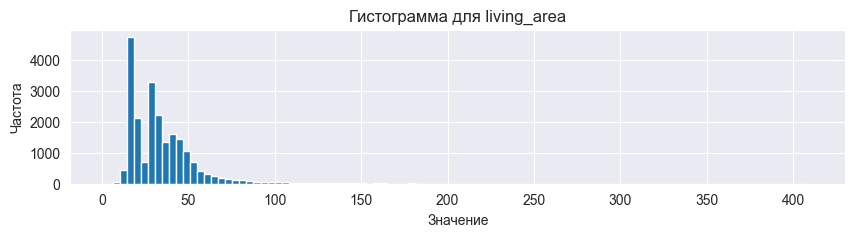

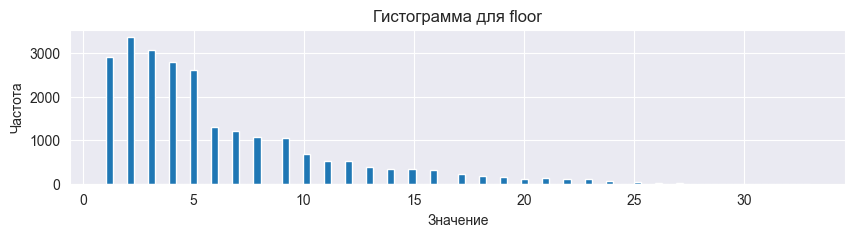

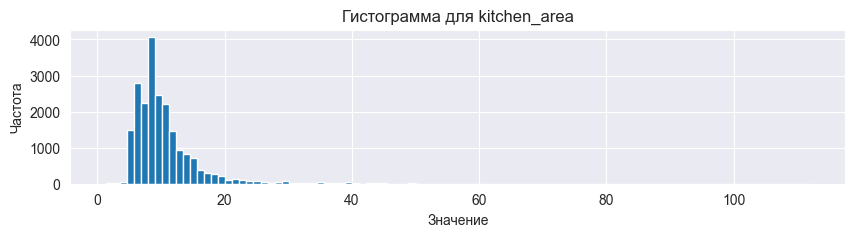

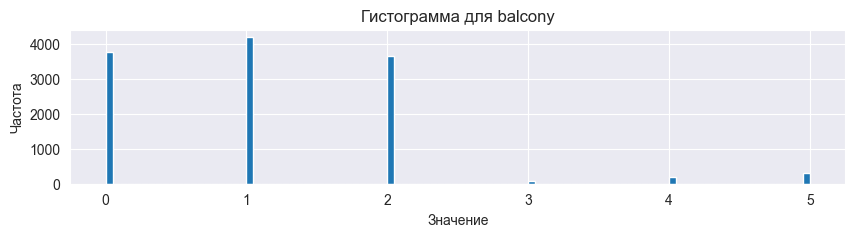

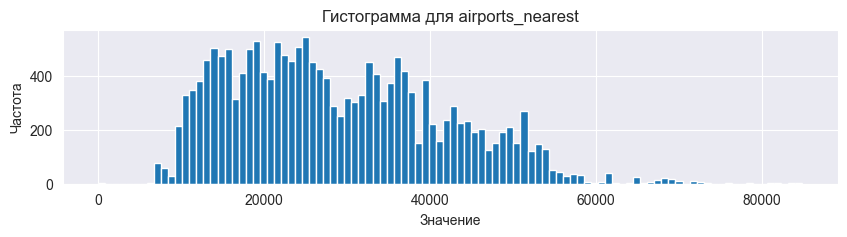

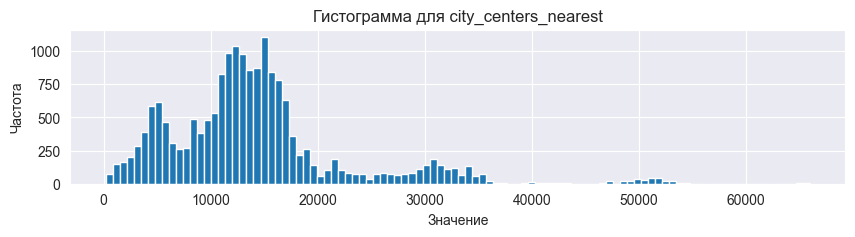

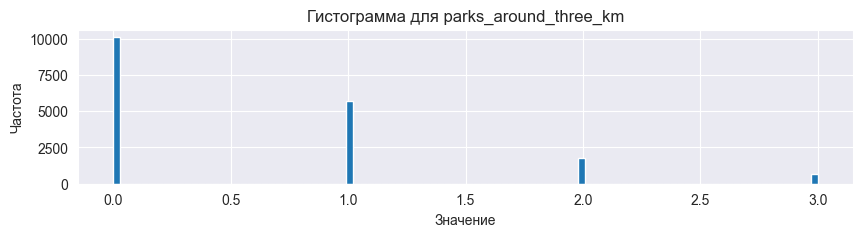

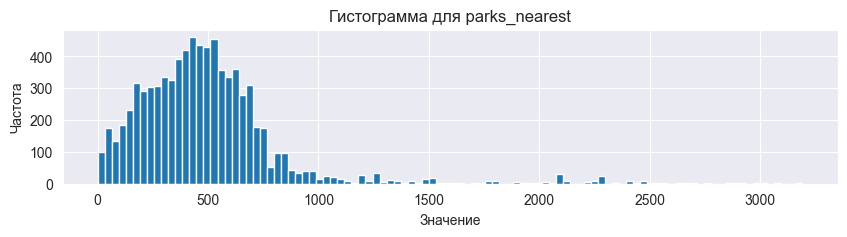

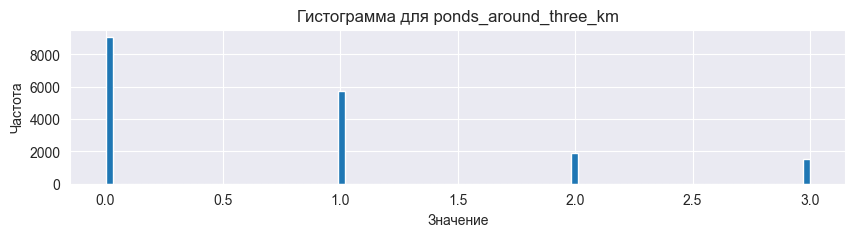

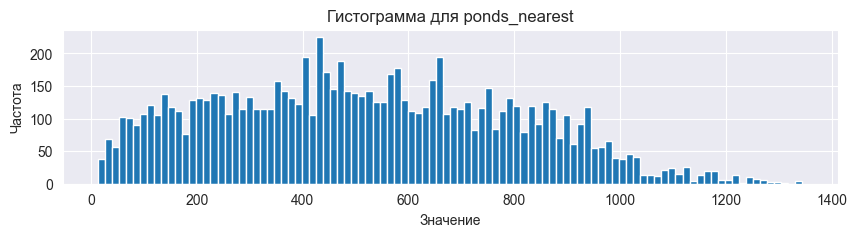

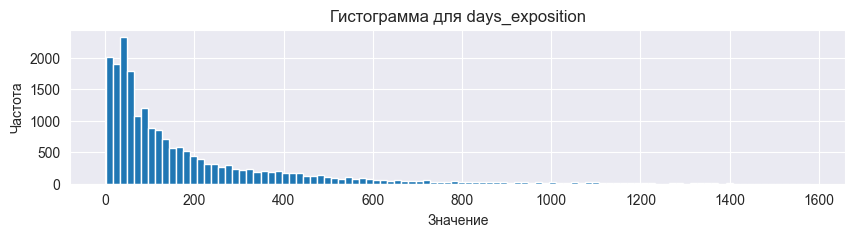

In [416]:
# Посмотрим гистограммы для всех числовых столбцов
columns_for_hist = original_df.select_dtypes(include=['int64', 'float64']).columns
for column in columns_for_hist:
    fig, ax = plt.subplots()
    ax.set_xlabel('Значение')
    ax.set_ylabel('Частота')
    ax.set_title('Гистограмма для ' + column)
    original_df[column].hist(bins=100, figsize=(10, 2))
    plt.show()

В части данных можем наблюдать как выбросы, так и аномальные пики. Все их нужно будет изучить и отработать.

## Предобработка данных

### Преобразование типов


In [417]:
# Оставим оригинальные данные как есть, скопируем в новый датафрейм и дальше будем работать с ним
df: pd.DataFrame() = original_df.copy()

In [418]:
# Преобразуем first_day_exposition
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [419]:
# Столбцы floors_total, balcony, parks_around_three_km, ponds_around_three_km достаточно просто преобразовать в int64. Автоматика не сработала из-за NaN значений.
columns_to_edit = ['floors_total', 'balcony', 'parks_around_three_km', 'ponds_around_three_km']
df.loc[:, columns_to_edit] = df.loc[:, columns_to_edit].astype('Int64')

In [420]:
# Столбец days_exposition придётся сначала округлить. В некоторых значениях есть дробная часть (похоже на некорректное округление).
df['days_exposition'] = df['days_exposition'].round().astype('Int64')

In [421]:
# Столбец is_apartment достаточно просто преобразовать в boolean.
df['is_apartment'] = df['is_apartment'].astype('boolean')

In [422]:
# Финальный чек по типам
display(df.head())
display(df.dtypes)
f'Не потеряли ни одного пропуска: {original_df.isna().sum().sum() == df.isna().sum().sum()}'

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_three_km,parks_nearest,ponds_around_three_km,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,<NA>,False,False,25.0,<NA>,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,<NA>,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,<NA>,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,<NA>,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,<NA>,False,False,41.0,<NA>,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121


total_images                      int64
last_price                      float64
total_area                      float64
first_day_exposition     datetime64[ns]
rooms                             int64
ceiling_height                  float64
floors_total                      Int64
living_area                     float64
floor                             int64
is_apartment                    boolean
studio                             bool
open_plan                          bool
kitchen_area                    float64
balcony                           Int64
locality_name                    object
airports_nearest                float64
city_centers_nearest            float64
parks_around_three_km             Int64
parks_nearest                   float64
ponds_around_three_km             Int64
ponds_nearest                   float64
days_exposition                   Int64
dtype: object

'Не потеряли ни одного пропуска: True'

### Пропуски

In [423]:
# is_apartment
display(df['is_apartment'].value_counts(dropna=False))
df['is_apartment'].fillna(True, inplace=True)

NaN      20924
False     2725
True        50
Name: is_apartment, dtype: Int64

В столбце is_apartment почти 90% пропусков. Причем подавляющее число заполненных клеток - False. Можно предположить, что эта клетка заполнялась преимущественно в том случае, когда квартира не являлась апартаментами. **Необходимо подтверждение от Яндекс.Недвижимости.** На пока предположим, что все NaN значения это дефолтные True.

In [424]:
# balcony
display(df['balcony'].value_counts(dropna=False))
df['balcony'].fillna(0, inplace=True)

NaN    11519
1       4195
0       3758
2       3659
5        304
4        183
3         81
Name: balcony, dtype: Int64

Несмотря на то, что часть данных заполнена 0, мы всё же предположим, что незаполненные ячейки соответствуют отсутствию балконов. Логично, что при заполнении информации по квартирам владельцы квартир без балконов просто пропускали это поле.

In [425]:
# ceiling_height
df['ceiling_height'].value_counts(dropna=False)

NaN     9195
2.50    3515
2.60    1646
2.70    1574
3.00    1112
        ... 
4.06       1
3.68       1
1.75       1
5.00       1
4.65       1
Name: ceiling_height, Length: 184, dtype: int64

- Количество пропусков в данном столбце значительное. Порядка 40% владельцев не указали этот параметр.
- Удалить столько значений мы не можем. Заполнить общей медианой - плохой вариант, т.к. он сильно повлияет на общее распределение данных. Других столбцов, как-то связанных с исследуемым в данных нет, поэтому заполнять медианами по каким-то подгруппам тоже не получится.
- Разумным кажется пока оставить пропуски. В дальнейшем, для анализа где будет задействован этот столбец, возможно, нам будет достаточно и оставшихся 60% строк.

In [426]:
# parks_nearest, parks_around_three_km, ponds_nearest, ponds_around_three_km, airports_nearest и city_centers_nearest
df[df['airports_nearest'].isna()
   & df['city_centers_nearest'].isna()
   & df['parks_nearest'].isna()
   & df['ponds_nearest'].isna()
   & df['parks_around_three_km'].isna()
   & df['ponds_around_three_km'].isna()].shape[0]

5518

Есть 5518 строчек в которых данные по всем 6 столбцам отсутствуют. Это число очень близко к количеству пропусков в airports_nearest, city_centers_nearest, ponds_around_three_km, parks_around_three_km. С этими пропусками пока сделать ничего невозможно. **Либо такие данные не собирались, либо произошла какая-то ошибка при сборе/обработке данных.**

In [427]:
display(
    df[~(df['parks_around_three_km'].isna()) & (df['parks_nearest'].isna())]['parks_around_three_km'].value_counts())
df[~(df['parks_around_three_km'].isna()) & (df['ponds_nearest'].isna())]['ponds_around_three_km'].value_counts()

0    10102
Name: parks_around_three_km, dtype: Int64

0    9071
Name: ponds_around_three_km, dtype: Int64

Оставшиеся пропуски по столбцам parks_nearest и ponds_nearest хорошо согласуются с данными столбцов parks_around_three_km и ponds_around_three_km. Т.е если информации по ближайшему парку/пруду нет, то и количество таких парков/прудов в районе 3км будет 0. Как вариант можно было бы заполнить эти пропуски float('inf'), однако пока просто оставим NaN.

In [428]:
# Оставшиеся пропуски.
display(df[['days_exposition', 'kitchen_area', 'living_area', 'floors_total', 'locality_name']].isna().sum())
df.dropna(subset=['floors_total', 'locality_name'], axis='index', inplace=True)

days_exposition    3181
kitchen_area       2278
living_area        1903
floors_total         86
locality_name        49
dtype: int64

- days_exposition, kitchen_area и living_area трогать тоже не будем. Доля пропусков от 13,4% и ниже. Очевидных способов заполнить данные нет. Пропуски скорее всего связаны с непредоставлением данных в сервис.
- Незначительное количество пропусков в floors_total и locality_name удалим.

In [429]:
# Уберем повторы в locality_name
df.select_dtypes(include=['object']).columns

Index(['locality_name'], dtype='object')

In [430]:
df['locality_name'] = df['locality_name'] \
    .apply(lambda x: x.replace('посёлок', '')
           .replace('Пансионат', '')
           .replace('Форт', '')
           .replace('городского типа', '')
           .replace('городской', '')
           .replace('деревня', '')
           .replace('коттеджный', '')
           .replace('поселок', '')
           .replace('при железнодорожной станции', '')
           .replace('садоводческое некоммерческое товарищество', '')
           .replace('садовое товарищество', '')
           .replace('село', '')
           .replace('станции', '')
           .strip())

In [431]:
df['locality_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жил', 'Жилгородок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зелёный Бор', 'Зимитицы', 'Ивангород', 

Т.к. данные только по Санкт-Петербургу и соседним населённым пунктам - можно смело убирать различные приставки и оставить только имена. Вероятность того, что вокруг Спб будут населенные пункты с одним названием, но разного типа очень мала.

### Добавление в таблицу новых столбцов

In [432]:
# Цена одного квадратного метра общей площади
df['last_price_for_meter'] = (df['last_price'] / df['total_area']).round(2)

In [433]:
# День недели публикации объявления
df['weekday_of_publication'] = df['first_day_exposition'].dt.dayofweek

In [434]:
# Месяц и год публикации объявления
df['month_of_publication'] = df['first_day_exposition'].dt.month
df['year_of_publication'] = df['first_day_exposition'].dt.year

In [435]:
# Тип этажа квартиры (значения — «первый», «последний», «другой»)
func = lambda x: 'первый' if x['floor'] == 1 else ('последний' if x['floor'] == x['floors_total'] else 'другой')
df['floor_type'] = df.apply(func, axis='columns')

In [436]:
# Расстояние до центра города в километрах
df['city_centers_nearest_in_km'] = (df['city_centers_nearest'] / 1000).round(0).astype('Int64')

In [437]:
# Проверки
display(df.head())
df.info()
df.isna().sum().sort_values(ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_three_km,parks_nearest,ponds_around_three_km,ponds_nearest,days_exposition,last_price_for_meter,weekday_of_publication,month_of_publication,year_of_publication,floor_type,city_centers_nearest_in_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.37,3,3,2019,другой,16
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,True,False,False,11.0,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.79,1,12,2018,первый,19
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,3,8,2015,другой,14
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10,4,7,2015,другой,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1,6,2018,другой,8


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   total_images                23565 non-null  int64         
 1   last_price                  23565 non-null  float64       
 2   total_area                  23565 non-null  float64       
 3   first_day_exposition        23565 non-null  datetime64[ns]
 4   rooms                       23565 non-null  int64         
 5   ceiling_height              14481 non-null  float64       
 6   floors_total                23565 non-null  Int64         
 7   living_area                 21700 non-null  float64       
 8   floor                       23565 non-null  int64         
 9   is_apartment                23565 non-null  boolean       
 10  studio                      23565 non-null  bool          
 11  open_plan                   23565 non-null  bool      

parks_nearest                 15535
ponds_nearest                 14529
ceiling_height                 9084
airports_nearest               5524
city_centers_nearest_in_km     5501
city_centers_nearest           5501
ponds_around_three_km          5500
parks_around_three_km          5500
days_exposition                3171
kitchen_area                   2222
living_area                    1865
floor_type                        0
year_of_publication               0
month_of_publication              0
weekday_of_publication            0
last_price_for_meter              0
total_images                      0
last_price                        0
balcony                           0
open_plan                         0
studio                            0
is_apartment                      0
floor                             0
floors_total                      0
rooms                             0
first_day_exposition              0
total_area                        0
locality_name               

## Исследовательский анализ данных

### Общая площадь и стоимость квартиры

In [438]:
display(df['total_area'].describe())
iqr = df['total_area'].describe()['75%'] - df['total_area'].describe()['25%']
max_norm_total_area = df['total_area'].describe()['75%'] + 1.5 * iqr
min_norm_total_area = df['total_area'].describe()['25%'] - 1.5 * iqr
min_norm_total_area, max_norm_total_area

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

(-4.550000000000004, 114.25)

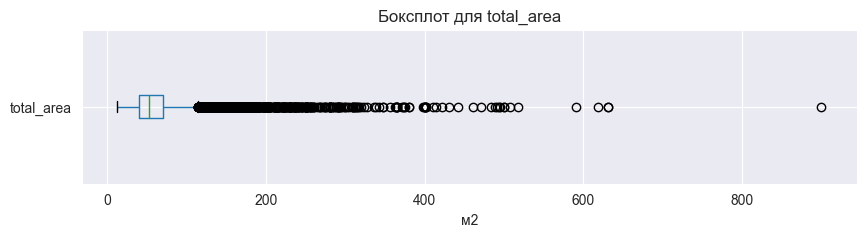

In [439]:
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_title('Боксплот для total_area')
ax.set_xlabel('м2')
df.boxplot('total_area', autorange=True, vert=False, grid=True, ax=ax);

In [440]:
display(df['last_price'].describe())
iqr = df['last_price'].describe()['75%'] - df['last_price'].describe()['25%']
max_norm_last_price = df['last_price'].describe()['75%'] + 1.5 * iqr
min_norm_last_price = df['last_price'].describe()['75%'] - 1.5 * iqr
min_norm_last_price, max_norm_last_price

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

(1705000.0, 11875000.0)

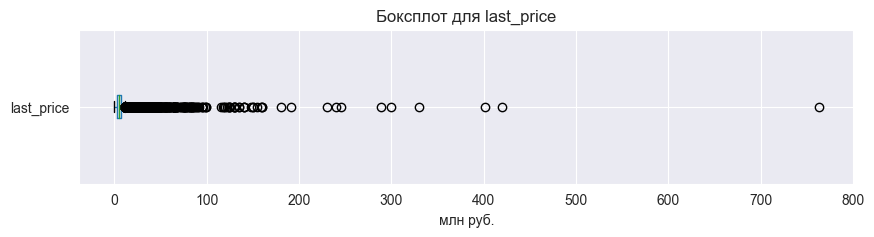

In [441]:
# Боксплот в миллионах
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_title('Боксплот для last_price')
ax.set_xlabel('млн руб.')
pd.DataFrame(df['last_price'] / 10**6).boxplot('last_price', autorange=True, vert=False, grid=True, ax=ax);

In [442]:
# Чтобы выявить ошибки можно посмотреть на площадь в связке со стоимостью за метр
display(df['last_price_for_meter'].describe())
iqr = df['last_price_for_meter'].describe()['75%'] - df['last_price_for_meter'].describe()['25%']
max_norm_last_price_for_meter = df['last_price_for_meter'].describe()['75%'] + 1.5 * iqr
min_norm_last_price_for_meter = df['last_price_for_meter'].describe()['75%'] - 1.5 * iqr
min_norm_last_price_for_meter, max_norm_last_price_for_meter

count    2.356500e+04
mean     9.940584e+04
std      5.038943e+04
min      1.118300e+02
25%      7.656613e+04
50%      9.500000e+04
75%      1.142132e+05
max      1.907500e+06
Name: last_price_for_meter, dtype: float64

(57742.59500000001, 170683.805)

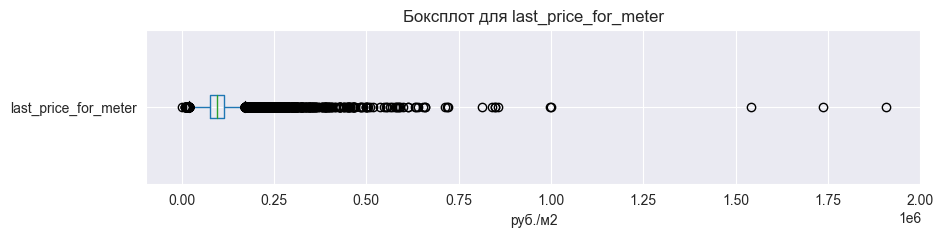

In [443]:
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_title('Боксплот для last_price_for_meter')
ax.set_xlabel('руб./м2')
df.boxplot('last_price_for_meter', autorange=True, vert=False, ax=ax);

In [444]:
display(df.shape)
df = df[df['total_area'] < 290]  # Отрезаем слишком большие квартиры
df = df[df['last_price'] < 0.5 * (10 ** 8)]  # Отрезаем квартиры с огромной стоимостью
df = df[df['last_price'] > min_norm_last_price]  # Отрезаем квартиры с огромной стоимостью
df = df[df['last_price_for_meter'] < 0.6 * (10 ** 6)]  # Отрезаем квартиры с ненормально большой стоимостью за квадрат
df = df[df['last_price_for_meter'] > min_norm_last_price_for_meter]  #Отрезаем квартиры с ненормально низкой стоимостью за квадрат
df.shape

(23565, 28)

(20755, 28)

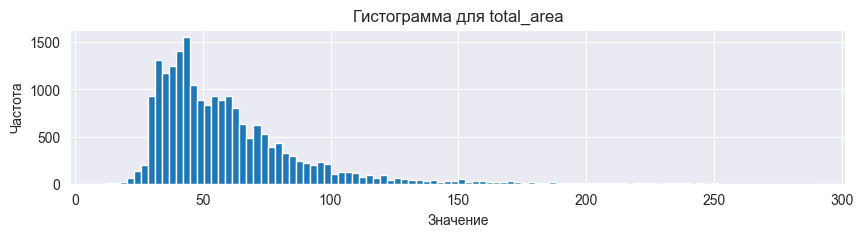

In [445]:
fig, ax = plt.subplots()
ax.set_title('Гистограмма для total_area')
ax.set_xlabel('Значение')
ax.set_ylabel('Частота')
df['total_area'].hist(bins=100, figsize=(10, 2))
plt.show()

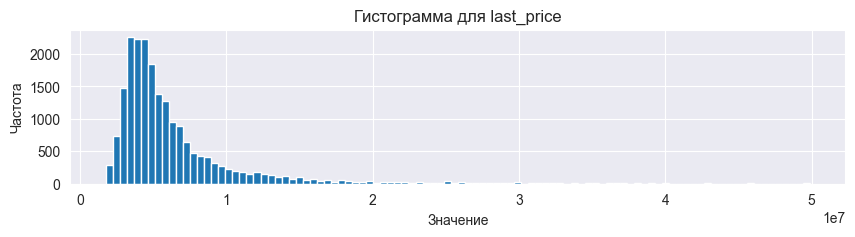

In [446]:
fig, ax = plt.subplots()
ax.set_title('Гистограмма для last_price')
ax.set_xlabel('Значение')
ax.set_ylabel('Частота')
df['last_price'].hist(bins=100, figsize=(10, 2))
plt.show()

- Данные по площади квартир распределяются от 12 до 900 м2. Это вполне разумный диапазон для крупного города и его окрестностей. Однако для целей анализа можно избавиться от части хвоста.
- Разброс цен лежит в пределах от 12 000 до 760 000 000. Здесь есть как явно заниженные строки, так и очень завышенные. От них стоит избавиться.
- Так же стоит избавиться от строк с очень маленькой и очень большой стоимостью за квадрат. Этот показатель может быть маркером ошибки.
- Итого: мы срезаем квартиры площадью более 290 м2, ценой более 50 000 000, ценой менее 1 705 000 и квартиры со стоимостью метра более 600 000 и менее 57 742. Количество строк в данных снизится при этом с 23565 до 20755.
- Итоговые формы гистограмм похожи на распределение Пуассона, но для total_area имеет далеко не идеальную форму. Скорее всего это связано с тем, что у квартир есть типовые планировки под различные форматы проживания и из-за этого имеются небольшие пики в районе 30, 45, 55 и 80 м2.

### Жилая площадь

In [447]:
display(df['living_area'].describe())
iqr = df['living_area'].describe()['75%'] - df['living_area'].describe()['25%']
max_norm_living_area = df['living_area'].describe()['75%'] + 1.5 * iqr
min_norm_living_area = df['living_area'].describe()['75%'] - 1.5 * iqr
min_norm_living_area, max_norm_living_area

count    19276.000000
mean        33.738822
std         19.312973
min          2.000000
25%         18.400000
50%         30.000000
75%         42.000000
max        211.000000
Name: living_area, dtype: float64

(6.599999999999994, 77.4)

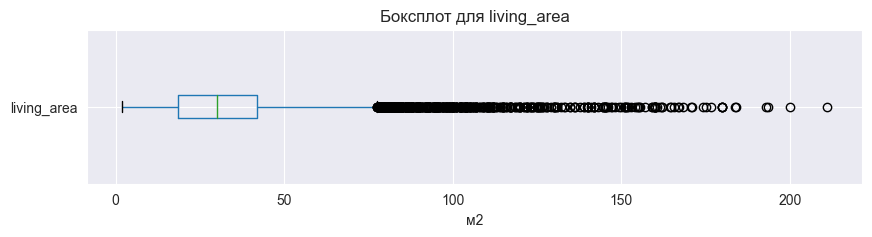

In [448]:
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_title('Боксплот для living_area')
ax.set_xlabel('м2')
df.boxplot('living_area', autorange=True, vert=False, ax=ax);

In [449]:
display(df.shape)
df = df[(df['living_area'] > min_norm_living_area) & (df['living_area'] < max_norm_living_area)] # Срезаем по iqr.
df.shape

(20755, 28)

(18638, 28)

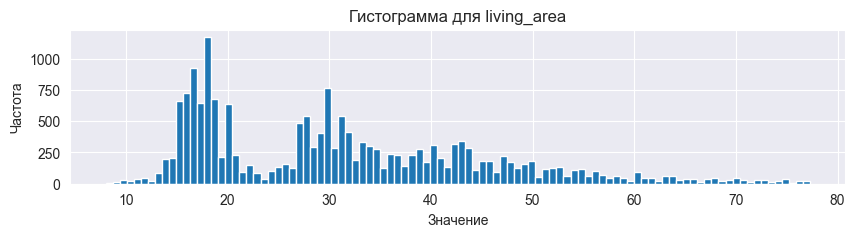

In [450]:
fig, ax = plt.subplots()
ax.set_title('Гистограмма для living_area')
ax.set_xlabel('Значение')
ax.set_ylabel('Частота')
df['living_area'].hist(bins=100, figsize=(10, 2))
plt.show()

- В исходных данных довольно много квартир с living_area менее 6 метров. В РФ согласно законодательству такие квартиры вообще запрещены (от 6 до 8 м2 на одного человека - это минимум). Жилая площадь свыше 77 метров является в данных пределом нормы по iqr.
- Таким образом, строки с площадью менее 6 и более 77 м (по iqr) удаляются из анализа.
- Распределение имеет смешанный характер. Наблюдается 2 отдельных пика около 18 и 30 м2. Так же есть небольшой пик в районе 45 м2. Вероятно причина так же в наличии типовых планировок, которые пользуются особой популярностью как у застройщиков, так и покупателей недвижимости.
- Количество строк в данных снижается с 20755 до 18638.

### Площадь кухни

In [451]:
display(df['kitchen_area'].describe())
iqr = df['kitchen_area'].describe()['75%'] - df['kitchen_area'].describe()['25%']
max_norm_kitchen_area = df['kitchen_area'].describe()['75%'] + 1.5 * iqr
min_norm_kitchen_area = df['kitchen_area'].describe()['75%'] - 1.5 * iqr
min_norm_kitchen_area, max_norm_kitchen_area

count    17935.000000
mean        10.344498
std          5.038985
min          1.300000
25%          7.100000
50%          9.300000
75%         11.900000
max         75.000000
Name: kitchen_area, dtype: float64

(4.699999999999999, 19.1)

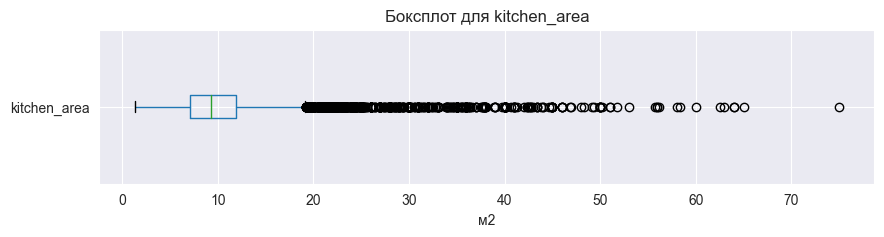

In [452]:
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_title('Боксплот для kitchen_area')
ax.set_xlabel('м2')
df.boxplot('kitchen_area', autorange=True, vert=False, ax=ax);

In [453]:
display(df.shape)
df = df[(df['kitchen_area'] > min_norm_kitchen_area) & (df['kitchen_area'] < max_norm_kitchen_area)] # Срезаем по iqr.
df.shape

(18638, 28)

(17057, 28)

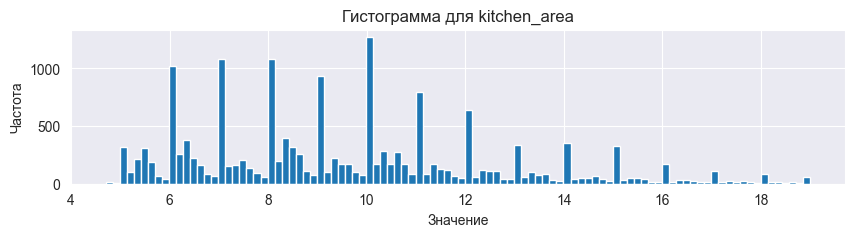

In [454]:
fig, ax = plt.subplots()
ax.set_title('Гистограмма для kitchen_area')
ax.set_xlabel('Значение')
ax.set_ylabel('Частота')
df['kitchen_area'].hist(bins=100, figsize=(10, 2))
plt.show()

In [455]:
# Доля целых значений в столбце
(df['kitchen_area'] % 1 == 0).mean()

0.44861347247464384

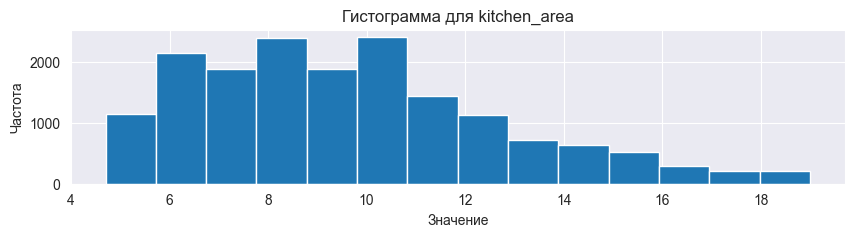

In [456]:
fig, ax = plt.subplots()
ax.set_title('Гистограмма для kitchen_area')
ax.set_xlabel('Значение')
ax.set_ylabel('Частота')
df['kitchen_area'].hist(bins=14, figsize=(10, 2))
plt.show()

- Согласно iqr в пределах усов находятся kitchen_area от 4,7 до 19,1 м2. Средней кухней по данным является кухня размером в 9-10 м2.
- На детальной гистограмме видно, что есть много локальных пиков для целых значений площади кухни. Это скорее всего связано с тем, что довольно весомая часть данных собиралась в целых значениях. В данных эта доля составляет около 45%. Это скорее особенность данных, делать с этим пока ничего не будем.
- Если уменьшить количество корзин в гистограмме, чтобы сгладить эффект округленных значений, мы увидим относительно плавное распределение.

### Количество комнат

In [267]:
display(df['rooms'].value_counts(dropna=False)) # абсолютное количество
df['rooms'].value_counts(dropna=False)/df['rooms'].value_counts(dropna=False).sum() # относительное количество

1    6377
2    5841
3    4129
4     651
5      53
6       5
7       1
Name: rooms, dtype: int64

1    0.373864
2    0.342440
3    0.242071
4    0.038166
5    0.003107
6    0.000293
7    0.000059
Name: rooms, dtype: float64

In [268]:
f'Доля квартир с 5+ комнатами: {(df["rooms"] >= 5).mean():.1%}'

'Доля квартир с 5+ комнатами: 0.3%'

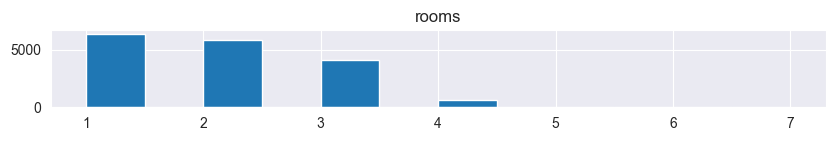

In [269]:
fig, ax = plt.subplots()
ax.set_title('rooms')
df['rooms'].hist(bins=12, figsize=(10, 1))
plt.show()

- С оставшимися данными всё впорядке. Больше всего однокомнатных квартир, затем двухкомнатных и т.д.
- Доля квартир с 5+ количеством комнат не превышает 1%.

### Высота потолков

In [270]:
df['ceiling_height'].sort_values(ascending=False).unique()

array([32.  , 27.5 , 27.  , 26.  , 25.  , 24.  , 22.6 , 20.  , 14.  ,
        8.3 ,  8.  ,  4.8 ,  4.5 ,  4.4 ,  4.37,  4.3 ,  4.25,  4.2 ,
        4.19,  4.15,  4.1 ,  4.06,  4.  ,  3.98,  3.95,  3.93,  3.9 ,
        3.88,  3.85,  3.84,  3.83,  3.8 ,  3.78,  3.75,  3.7 ,  3.67,
        3.66,  3.65,  3.63,  3.62,  3.6 ,  3.59,  3.57,  3.56,  3.55,
        3.54,  3.52,  3.5 ,  3.49,  3.48,  3.47,  3.46,  3.45,  3.44,
        3.42,  3.4 ,  3.39,  3.38,  3.37,  3.36,  3.35,  3.34,  3.33,
        3.32,  3.31,  3.3 ,  3.28,  3.27,  3.26,  3.25,  3.24,  3.23,
        3.22,  3.21,  3.2 ,  3.18,  3.17,  3.16,  3.15,  3.14,  3.13,
        3.12,  3.11,  3.1 ,  3.09,  3.08,  3.07,  3.06,  3.05,  3.04,
        3.03,  3.02,  3.01,  3.  ,  2.98,  2.97,  2.96,  2.95,  2.94,
        2.93,  2.92,  2.91,  2.9 ,  2.89,  2.88,  2.87,  2.86,  2.85,
        2.84,  2.83,  2.82,  2.81,  2.8 ,  2.79,  2.78,  2.77,  2.76,
        2.75,  2.74,  2.73,  2.72,  2.71,  2.7 ,  2.69,  2.68,  2.67,
        2.66,  2.65,

In [271]:
df.query('ceiling_height >=14')['ceiling_height'].value_counts(dropna=False) # Имеется 13 значений, в которые трудно поверить.

27.0    3
25.0    3
14.0    1
20.0    1
24.0    1
22.6    1
26.0    1
27.5    1
32.0    1
Name: ceiling_height, dtype: int64

In [272]:
display(df.shape)
# Заменяем аномальные значения (скорее всего аномалии связаны с ошибкой ввода данных)
df['ceiling_height'].loc[df['ceiling_height'] >= 14] = df['ceiling_height'].loc[df['ceiling_height'] >= 14] / 10
# Удаляем квартиру для хоббитсов.
df = df[(df['ceiling_height'] > 1) | df['ceiling_height'].isna()]
display(df.shape)

(17057, 28)

(17056, 28)

In [273]:
df['ceiling_height'].describe()

count    10945.000000
mean         2.702442
std          0.249869
min          1.400000
25%          2.520000
50%          2.650000
75%          2.780000
max          8.300000
Name: ceiling_height, dtype: float64

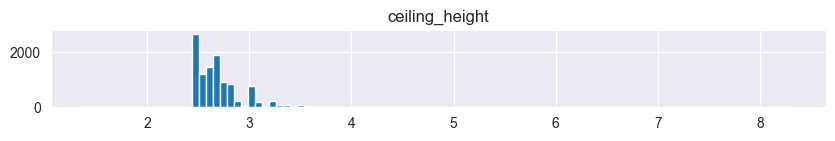

In [274]:
fig, ax = plt.subplots()
ax.set_title('ceiling_height')
df['ceiling_height'].hist(bins=100, figsize=(10, 1))
plt.show()

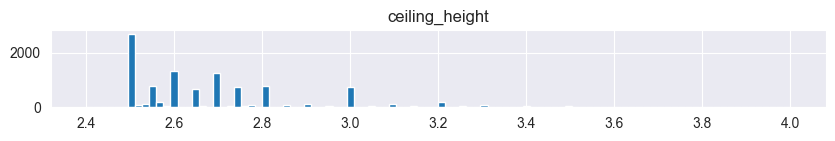

In [275]:
fig, ax = plt.subplots()
ax.set_title('ceiling_height')
df['ceiling_height'].hist(bins=100, figsize=(10, 1), range=(2.4, 4))
plt.show()

- В данных скорее всего есть ошибки. Высота потолка 10+ метров скорее всего ошибка ввода (забыли поставить разделитель для дробной части). Приводим в порядок делением на 10.
- Высоту потолка в 8.3 метра можно себе представить. Высоту потолка менее 1.75 метра тоже лучше не брать в расчёт. Это 1 строка, она скорее всего ошибочная. Можно её удалить. В РФ вообще запрещена высота потолка менее 2,5 метра, но сделаем поправку на старый фонд и значение 1.75 м будем считать допустимым.
- В итоге так же видим типовые строительные решения (2.5, 2.6, 2.7, 3.0 метра) преобладают в данных. Квартиры с высоким потолком встречаются реже чем с небольшим стандартным.

### Тип этажа

In [276]:
df['floor_type'].value_counts(dropna=False)

другой       13031
последний     2128
первый        1897
Name: floor_type, dtype: int64

In [277]:
df['floor_type'].value_counts(normalize=True, dropna=False)

другой       0.764013
последний    0.124765
первый       0.111222
Name: floor_type, dtype: float64

<AxesSubplot:>

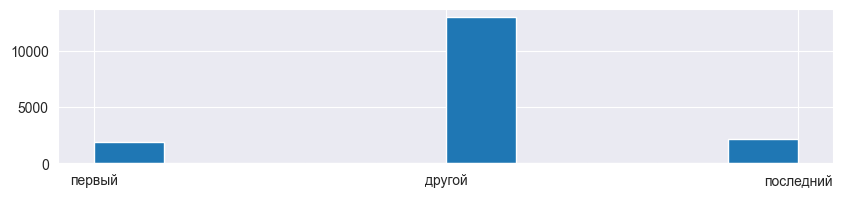

In [278]:
df['floor_type'].hist(figsize=(10, 2))

- Квартир на первом и последнем этажах почти одинаковое количество(квартир на 1 этаже чуть меньше).
- Доля "других" квартир составляет более трёх четвертей.

### Общее количество этажей в доме

In [279]:
df['floors_total'].value_counts(dropna=False).sort_index(ascending=False)

60        1
52        1
37        1
36        3
35       15
29        1
28       20
27      144
26      102
25      841
24      366
23      273
22      230
21      110
20      198
19      248
18      374
17      703
16     1110
15      275
14      466
13      174
12     1133
11      153
10      954
9      3185
8       245
7       396
6       570
5      3594
4       725
3       354
2        86
1         5
NaN       0
Name: floors_total, dtype: Int64

In [280]:
df['floors_total'].value_counts(dropna=False, normalize=True)

5      0.210718
9      0.186738
12     0.066428
16      0.06508
10     0.055933
25     0.049308
4      0.042507
17     0.041217
6      0.033419
14     0.027322
7      0.023218
18     0.021928
24     0.021459
3      0.020755
15     0.016123
23     0.016006
19      0.01454
8      0.014364
22     0.013485
20     0.011609
13     0.010202
11      0.00897
27     0.008443
21     0.006449
26      0.00598
2      0.005042
28     0.001173
35     0.000879
1      0.000293
36     0.000176
60     0.000059
37     0.000059
29     0.000059
52     0.000059
NaN         0.0
Name: floors_total, dtype: Float64

In [281]:
display(df.shape)
df = df[df['floors_total'] <= 30] # Убираем небоскрёбы.
df.shape

(17056, 28)

(17035, 28)

<AxesSubplot:>

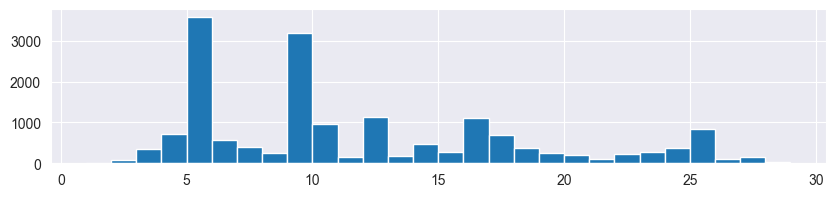

In [282]:
df['floors_total'].hist(bins=28, figsize=(10, 2))

- В данных в небольшом количестве представлены либо квартиры в небоскрёбах, либо ошибочно заполненные строчки. Оставим для дальнейшего рассмотрения только квартиры до 30 этажей.
- Количество строк в выборке сократилось незначительно (с 17056 до 17035).
- В распределении доминируют 5, 9-этажные здания. Это очень распространенная типовая этажность. Так же довольно часто можно встретить здания 10, 12, 16 и 25 этажей.

### Расстояние до центра города в метрах

In [283]:
df['city_centers_nearest'].describe()

count    14591.000000
mean     14714.158728
std       8499.061855
min        208.000000
25%      10354.000000
50%      13385.000000
75%      16453.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [284]:
df['city_centers_nearest'].isna().mean()

0.14346932785441738

<AxesSubplot:>

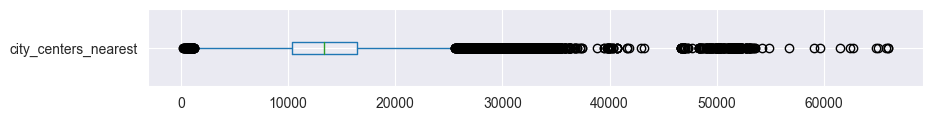

In [285]:
df.boxplot('city_centers_nearest', autorange=True, vert=False, figsize=(10, 1))

In [286]:
df.query('city_centers_nearest > 60000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_three_km,parks_nearest,ponds_around_three_km,ponds_nearest,days_exposition,last_price_for_meter,weekday_of_publication,month_of_publication,year_of_publication,floor_type,city_centers_nearest_in_km
577,7,4000000.0,59.0,2017-07-23,3,2.50,5,37.0,1,False,False,False,7.0,0,Молодёжное,84665.0,65764.0,0,NaN,0,NaN,<NA>,67796.61,6,7,2017,первый,66
2974,13,3200000.0,46.3,2018-03-31,2,2.50,3,29.2,2,True,False,False,7.0,1,Зеленогорск,81355.0,62454.0,0,NaN,0,NaN,205,69114.47,5,3,2018,другой,62
5218,15,3650000.0,53.8,2018-09-24,3,2.50,4,36.9,3,True,False,False,5.2,0,Молодёжное,83758.0,64857.0,0,NaN,0,NaN,121,67843.87,0,9,2018,другой,65
5340,19,3600000.0,50.6,2019-03-19,2,2.50,5,29.9,4,True,False,False,7.0,1,Молодёжное,84853.0,65952.0,0,NaN,0,NaN,<NA>,71146.25,1,3,2019,другой,66
9640,8,4200000.0,51.4,2014-12-10,2,2.55,5,31.0,2,True,False,False,6.0,1,Молодёжное,84869.0,65968.0,0,NaN,0,NaN,1194,81712.06,2,12,2014,другой,66
16569,13,3200000.0,52.8,2017-06-20,2,2.55,5,29.9,3,True,False,False,8.3,0,Ломоносов,53042.0,61495.0,2,223.0,0,NaN,240,60606.06,1,6,2017,другой,61
18884,15,3600000.0,57.6,2019-02-08,3,2.55,3,41.3,2,True,False,False,6.5,1,Зеленогорск,81607.0,62706.0,0,NaN,0,NaN,13,62500.00,4,2,2019,другой,63
20746,1,3300000.0,43.5,2016-02-16,2,2.55,4,27.2,2,True,False,False,5.0,1,Молодёжное,84006.0,65105.0,0,NaN,0,NaN,1043,75862.07,1,2,2016,другой,65


In [287]:
df.query('locality_name == "Зеленогорск"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_three_km,parks_nearest,ponds_around_three_km,ponds_nearest,days_exposition,last_price_for_meter,weekday_of_publication,month_of_publication,year_of_publication,floor_type,city_centers_nearest_in_km
302,6,3500000.0,31.0,2016-04-05,1,2.55,5,17.5,1,True,False,False,5.4,0,Зеленогорск,72005.0,53104.0,3,92.0,1,571.0,168,112903.23,1,4,2016,первый,53
376,18,8400000.0,84.0,2018-06-26,2,2.75,3,41.0,1,True,False,False,13.0,0,Зеленогорск,73827.0,54926.0,0,NaN,0,NaN,201,100000.00,1,6,2018,первый,55
939,17,3015000.0,31.2,2019-04-16,1,2.50,3,17.5,1,True,False,False,5.8,0,Зеленогорск,75646.0,56745.0,0,NaN,1,347.0,<NA>,96634.62,1,4,2019,первый,57
2036,19,6100000.0,50.0,2018-03-24,2,2.60,5,29.0,5,True,False,False,9.0,1,Зеленогорск,71618.0,52717.0,3,37.0,1,926.0,72,122000.00,5,3,2018,последний,53
2974,13,3200000.0,46.3,2018-03-31,2,2.50,3,29.2,2,True,False,False,7.0,1,Зеленогорск,81355.0,62454.0,0,NaN,0,NaN,205,69114.47,5,3,2018,другой,62
3477,4,6400000.0,67.2,2016-10-10,3,NaN,6,43.0,1,True,False,False,12.0,0,Зеленогорск,71597.0,52696.0,3,112.0,1,408.0,316,95238.10,0,10,2016,первый,53
3936,10,4250000.0,38.0,2017-11-30,1,2.70,3,20.0,3,True,False,False,8.0,0,Зеленогорск,72078.0,53177.0,3,533.0,2,123.0,179,111842.11,3,11,2017,последний,53
4441,6,2300000.0,31.0,2016-05-26,1,NaN,3,12.0,1,True,False,False,9.0,0,Зеленогорск,78527.0,59626.0,0,NaN,0,NaN,232,74193.55,3,5,2016,первый,60
4906,11,5500000.0,49.0,2017-10-24,2,2.50,5,29.0,3,True,False,False,8.5,1,Зеленогорск,71529.0,52628.0,3,296.0,2,521.0,25,112244.90,1,10,2017,другой,53
7324,13,5000000.0,46.3,2017-09-12,2,2.55,9,30.1,5,True,False,False,8.3,0,Зеленогорск,71869.0,52968.0,3,174.0,2,561.0,28,107991.36,1,9,2017,другой,53


In [288]:
df.groupby('locality_name')['city_centers_nearest'].agg(['count', 'mean', 'median', 'min', 'max']).sort_values('count', ascending=False)

,count,mean,median,min,max
locality_name,,,,,
Санкт-Петербург,12489,12027.350629,12568.0,208.0,29343.0
Шушары,374,24432.483957,24287.0,17231.0,31988.0
Пушкин,302,28757.453642,27909.0,24311.0,35610.0
Колпино,297,32127.835017,32018.0,29437.0,37477.0
Парголово,272,19868.746324,19292.0,17994.0,24400.0
...,...,...,...,...,...
Лебяжье,0,NaN,NaN,NaN,NaN
Лаголово,0,NaN,NaN,NaN,NaN
Куттузи,0,NaN,NaN,NaN,NaN


<AxesSubplot:>

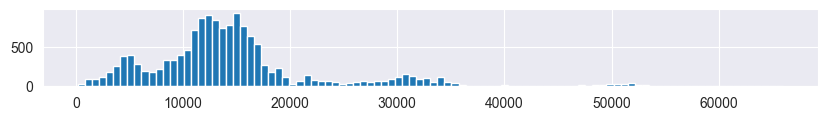

In [289]:
df['city_centers_nearest'].hist(bins=100, figsize=(10, 1))

- Расстояние от квартиры до ближайшего центра города в среднем составляет 13-14 км. Есть небольшое количество квартир совсем далеко от города (более 60км). Доля пропусков составляет около 15%.
- Данные вызывают вопросы. Взять, к примеру, Зеленогорск, который сам по себе город, находящийся от центра Санкт-Петербурга на расстоянии около 50км по прямой. В данных есть примеры где по этому городу расстояние до центра составляет более 60км. Разумно было бы указывать в этом столбце расстояние от квартиры в этом городе до центра этого города. **Необходимо уточнить методику сбора данных по этому столбцу**. Скорее всего здесь речь идет про расстояние до центра Петербурга.
- В любом случае в данных можно выделить 4 основные группы. Центр (до 8 км), спальные районы (до 20 км), пригород (до 35 км) и дальний пригород (свыше 35км). Основная часть квартир приходится на 2 группу.
- Удалять какие-то данные пока не целесообразно.

### Расстояние до ближайшего парка в метрах

In [290]:
df['parks_nearest'].value_counts(dropna=False)

NaN       10776
441.0        38
392.0        29
456.0        27
173.0        26
          ...  
1648.0        1
866.0         1
81.0          1
1211.0        1
2880.0        1
Name: parks_nearest, Length: 956, dtype: int64

In [291]:
df['parks_nearest'].describe()

count    6259.000000
mean      490.676306
std       334.886554
min         1.000000
25%       289.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [292]:
df[df['parks_nearest'] >= 3000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_three_km,parks_nearest,ponds_around_three_km,ponds_nearest,days_exposition,last_price_for_meter,weekday_of_publication,month_of_publication,year_of_publication,floor_type,city_centers_nearest_in_km
1590,3,7500000.0,70.0,2017-07-11,2,NaN,18,37.0,13,True,False,False,10.0,0,Санкт-Петербург,14878.0,9791.0,0,3064.0,1,264.0,4,107142.86,1,7,2017,другой,10
10959,9,3000000.0,31.1,2017-03-21,1,NaN,5,17.7,2,True,False,False,5.5,0,Санкт-Петербург,14821.0,9734.0,0,3190.0,1,431.0,234,96463.02,1,3,2017,другой,10
19430,9,3900000.0,30.5,2018-02-22,1,2.6,5,16.5,1,True,False,False,5.5,0,Санкт-Петербург,14821.0,9734.0,0,3190.0,1,431.0,176,127868.85,3,2,2018,первый,10


In [293]:
df['parks_nearest'].isna().mean()

0.6325799823891987

<AxesSubplot:>

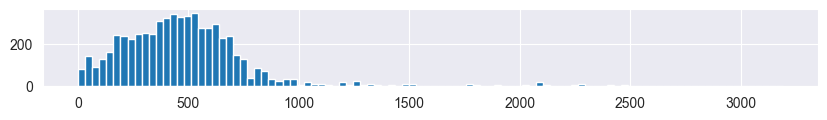

In [294]:
df['parks_nearest'].hist(bins=100, figsize=(10, 1))

- Около 60% пропусков в данных.
- Данные распределены довольно плавно. Значений превышающих более 3км (принятый радиус поиска) - 3 строки, но они выглядят нормально. Удалять какие-то данные нецелесообразно.

In [295]:
df.shape

(17035, 28)

### Скорость продажи квартир

<AxesSubplot:>

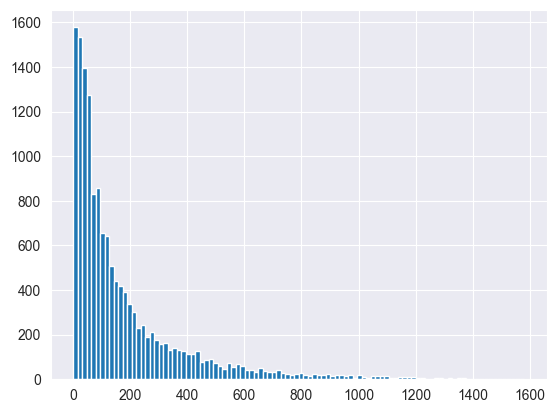

In [296]:
df['days_exposition'].hist(bins=100)

In [297]:
f'Доля пропусков в days_exposition: {df["days_exposition"].isna().mean():.1%}'

'Доля пропусков в days_exposition: 12.3%'

In [298]:
df['days_exposition'].describe(percentiles=[0.25, 0.5, 0.75, 0.9])

count    14943.000000
mean       177.441009
std        216.285291
min          1.000000
25%         42.000000
50%         96.000000
75%        225.000000
90%        448.000000
max       1580.000000
Name: days_exposition, dtype: float64

- Данные по времени нахождения объявлений в активном статусе свидетельствует о том, что квартиры в среднем продаются за 96 дней (медианное значение).
- При этом есть небольшая доля квартир, срок продажи по которым достигает от 800 до 1580 дней. За счёт этих квартир средний арифметический срок продажи составляет значительные 177 дней. При этом наблюдается очень большой разброс по времени продажи квартиры (дисперсия составляет 216 дней).
- В целом, около четверти квартир продаются в срок до 42 дней. Этот срок можно условно считать быстрым(25% персентиль по времени продажи).
- Если квартира не была реализована в первые 448 дней - время продажи можно считать необычно долгим (90% персентиль по времени продажи).

### Факторы влияния на общую стоимость объекта

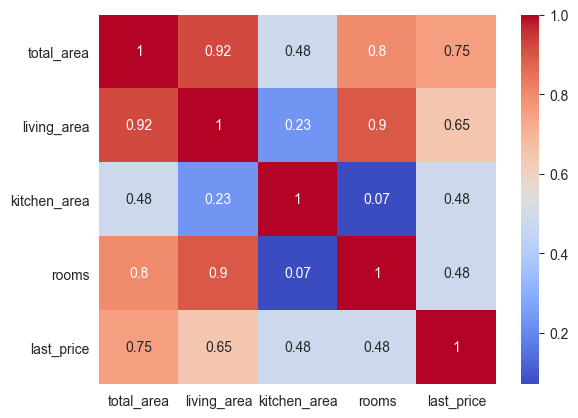

In [299]:
# Посмотрим на корреляции
df_to_analyze = df[['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type', 'weekday_of_publication', 'month_of_publication', 'year_of_publication', 'last_price']]
columns_for_corr = ['total_area', 'living_area', 'kitchen_area', 'rooms', 'last_price']
dataplot = sns.heatmap(df_to_analyze[columns_for_corr].corr(), annot=True, cmap='coolwarm')
plt.show()

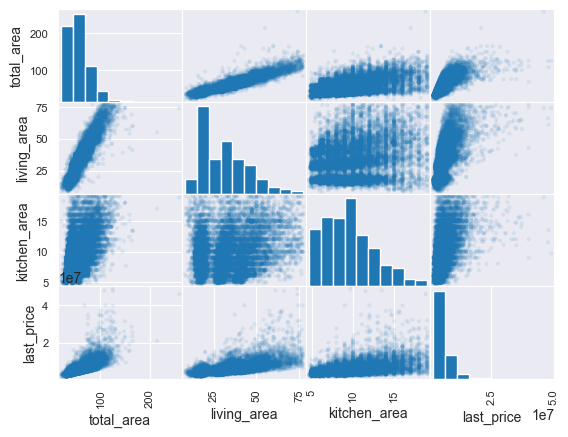

In [300]:
# Посмотрим на диаграммы рассеяния по избранным столбцам
pd.plotting.scatter_matrix(df_to_analyze[['total_area', 'living_area', 'kitchen_area', 'last_price']], alpha=0.1)
plt.show()

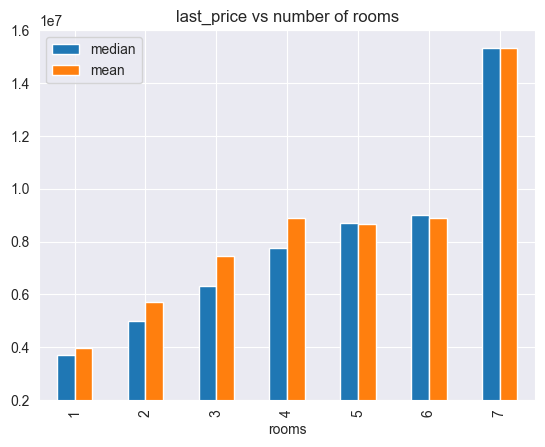

In [301]:
# Влияние количества комнат на стоимость продажи
current_pivot = df_to_analyze.pivot_table(index='rooms', values='last_price', aggfunc=['median', 'mean'])
current_pivot.columns = ['median', 'mean']
current_pivot.plot(kind='bar', ylim=(2 * 10**6, 16 * 10**6), title='last_price vs number of rooms')
plt.show()

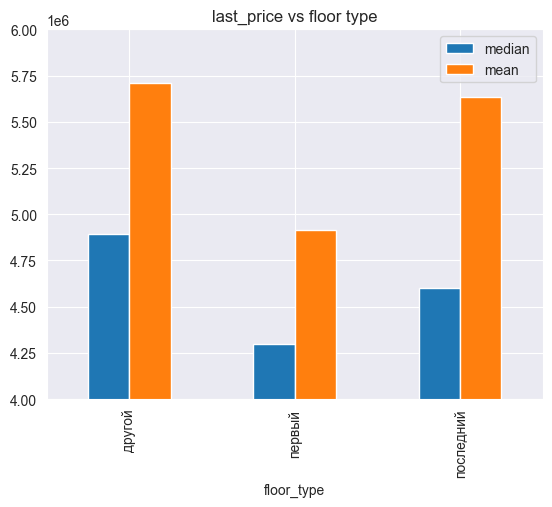

In [302]:
# Влияние этажа на стоимость продажи
current_pivot = df_to_analyze.pivot_table(index='floor_type', values='last_price', aggfunc=['median', 'mean'])
current_pivot.columns = ['median', 'mean']
current_pivot.plot(kind='bar', ylim=(4 * 10**6, 6 * 10**6), title='last_price vs floor type')
plt.show()

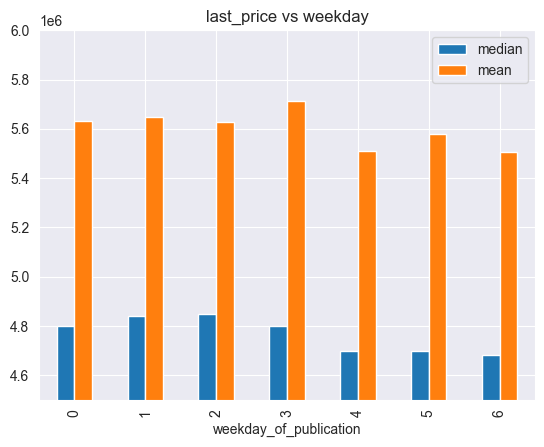

In [303]:
# Влияние дня недели выставления объявления о продаже на стоимость продажи
current_pivot = df_to_analyze.pivot_table(index='weekday_of_publication', values='last_price', aggfunc=['median', 'mean'])
current_pivot.columns = ['median', 'mean']
current_pivot.plot(kind='bar', ylim=(4.5 * 10**6, 6 * 10**6), title='last_price vs weekday')
plt.show()

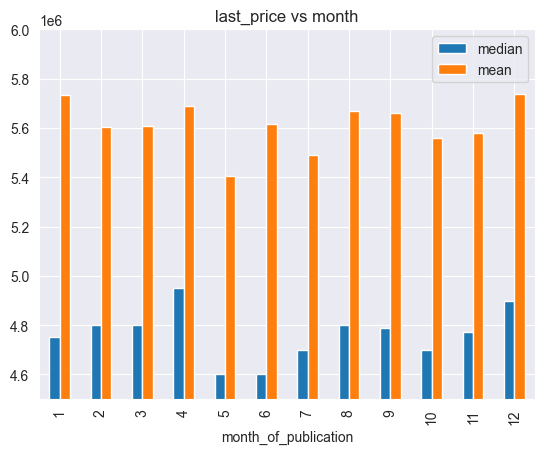

In [304]:
# Влияние месяца выставления объявления о продаже на стоимость продажи
current_pivot = df_to_analyze.pivot_table(index='month_of_publication', values='last_price', aggfunc=['median', 'mean'])
current_pivot.columns = ['median', 'mean']
current_pivot.plot(kind='bar', ylim=(4.5 * 10**6, 6 * 10**6), title='last_price vs month')
plt.show()

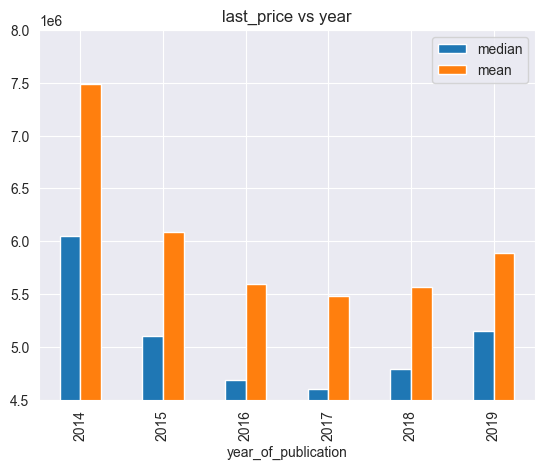

In [305]:
# Влияние года выставления объявления о продаже на стоимость продажи
current_pivot = df_to_analyze.pivot_table(index='year_of_publication', values='last_price', aggfunc=['median', 'mean'])
current_pivot.columns = ['median', 'mean']
current_pivot.plot(kind='bar', ylim=(4.5 * 10**6, 8 * 10**6), title='last_price vs year')
plt.show()

- Наибольшая корреляция last_price наблюдается с общей площадью квартиры. Она составляет около 75%. Так же высокая корреляция наблюдается с living_area и несколько меньшая с kitchen_area и rooms. Все эти показатели коррелируют друг с другом и оказывают значительное влияние на стоимость квартиры, что логично.
- По диаграммам рассеяния так же видно это влияния, причем заметно значительное увеличение разброса по стоимости квартир при росте её площади. Вероятно это связано с тем, что квартиры значительной площади чаще входят в сегмент элитного жилья, где в игру вступают уже другие индивидуальные факторы, которые могут оказывать значительное влияние на формирование цены.
- Дополнительный анализ влияния количества комнат на цену так же показывает, что сегмент квартир с 7+ количеством комнат значительно выбивается по средней и медианной стоимости. Видимо эта категория недвижимости пользуется популярностью у исключительно состоятельных покупателей.
- Так же стоит отметить, что цена на квартиры с количеством комнат от 4 до 6 не сильно отличается. Скорее всего это тот диапазон, где площадь квартир не сильно разнится, но она является достаточной для формирования различных планировок под разные потребности.
- Влияние этажа на стоимость квартиры ожидаемо. Квартиры на крайних этажах оцениваются ниже, чем квартиры на средних. При это первый этаж оценивается ниже последнего. Вероятно это связано с тем, что на первых этажах значительно понижено качество воздуха и повышено шумовое загрязнение. Последние этажи также могут быть чуть ценнее за счёт того, что они могут обладать некоторыми качествами, присущими элитной жилплощади (мансарда, видовые квартиры).
- Небольшое, но всё же влияние на стоимость квартиры оказывает месяц и даже день недели публикации объявления о продаже. Квартиры, которые опубликованы в период с пятницы по воскресенье продаются чуть дешевле. Вероятно это связано с тем, что объявления о продаже в будни обычно публикуют риэлторы, профессионально занимающиеся торговлей недвижимостью, а в выходные и вечером пятницы - частные продавцы. Зависимость от месяца публикации так же заметна и, вероятно, связана с бизнес-циклами и циклами в строительстве. Так заметен спад по цене для квартир, которые опубликованы в начале лета и начале учебного года. Анализ этого фактора довольно сложен и требует учёта внешних факторов, а также временных лагов между публикацией объявлений и датами продажи опубликованных квартир.
- Влияние года публикации объявления так же заметно, и так же обусловлено сложными внешними факторами (преимущественно макроэкономическими). Наибольшие цены в рассматриваемый период в среднем приходились на 2014 год, затем до 2017 наблюдался спад и затем рост.

### Средняя цена квадратного метра

In [306]:
# Формируем список топ 10 городов по количеству объявлений
locality_top_ten = df.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10).index
locality_top_ten

Index(['Санкт-Петербург', 'Мурино', 'Шушары', 'Кудрово', 'Пушкин', 'Колпино',
       'Всеволожск', 'Парголово', 'Гатчина', 'Петергоф'],
      dtype='object', name='locality_name')

In [307]:
# Срезаем необходимые строки
df_to_analyze = df[df['locality_name'].isin(locality_top_ten)]

In [308]:
# Готовим пивот
current_pivot = df_to_analyze.pivot_table(index='locality_name', values='last_price_for_meter', aggfunc=['count', 'mean'])
current_pivot.columns = ['count', 'mean']
current_pivot.sort_values('mean')

,count,mean
locality_name,,
Всеволожск,283,70611.755088
Гатчина,226,72958.782478
Колпино,298,76436.136812
Шушары,375,78980.237360
Петергоф,184,83775.550870
Мурино,437,86394.747437
Парголово,272,92227.321544
Кудрово,352,95824.706392
Пушкин,303,100991.199010


In [309]:
# Минимум и максимум по средней цене за квадрат
current_pivot.query('(mean == @current_pivot["mean"].min()) | (mean == @current_pivot["mean"].max())')

,count,mean
locality_name,,
Всеволожск,283,70611.755088
Санкт-Петербург,12519,108689.611539


- Наибольшая средняя (арифметически) цена за квадратный метр (108689) наблюдается в Санкт-Петербурге.
- Наименьшая средняя (арифметически) цена за квадратный метр (70611) наблюдается во Всеволжске.

### Средняя цена на километр от центра

<AxesSubplot:xlabel='city_centers_nearest_in_km'>

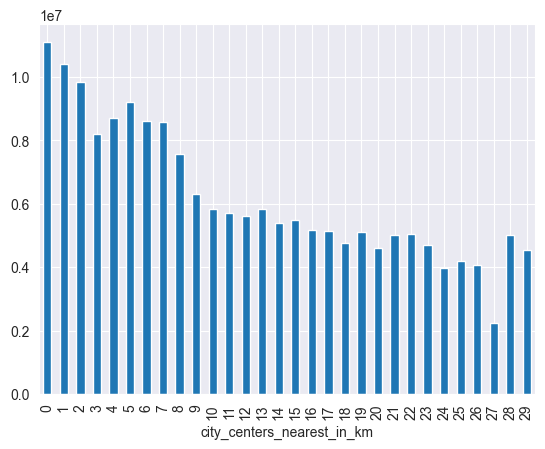

In [310]:
# Формируем пивот и строим график
df_to_analyze = df[df['locality_name'] == 'Санкт-Петербург']
current_pivot = df_to_analyze.pivot_table(index='city_centers_nearest_in_km', values='last_price', aggfunc=['mean', 'count'])
current_pivot.columns = ['mean', 'count']
current_pivot['mean'].plot(kind='bar')

In [311]:
f'Средняя дельта по цене на каждый дополнительный километр: {current_pivot["mean"].diff().mean():.0f}'

'Средняя дельта по цене на каждый дополнительный километр: -226483'

- Стоимость квартир в Санкт-Петербурге снижается по мере отдаления от центра.
- Каждый дополнительный километр отдаления от центра снижает стоимость квартиры примерно на 230 тыс. ₽.
- Условно центром города можно считать круг радиусом около 8-10 км. В этом диапазоне дополнительная близость к самой центральной точке города в среднем играет большее влияние на цену, чем для квартир в условно спальных районах. 
- Условно исторический центр - круг радиусом до 2-3 км, тут вклад расположения квартиры в её стоимость - максимальный.

## Общий вывод

**Проведена обработка данных из сервиса Яндекс Недвижимость по городу Санкт-Петербургу и соседним населенным пунктам:**
- Оригинальный датасет включал в себя 23 699 строк данных по 22 столбца в каждом. Проведен первоначальный визуальный осмотр данных и основных метрик по ним.
- Типы в датасете переведены в соответствии с типом информации, которая в них хранится. Типы подготовлены к дальнейшей обработке.
- Заполнены пропуски в столбцах is_apartment, balcony. Использованы предположения, которые необходимо подтвердить со стороны сервиса, предоставившего данные.
- Устранены неявные дублирования в столбце locality_name. Названия части населенных пунктов изменены.
- Оставлены пропуски в столбцах ceiling height, parks_nearest, parks_around_three_km, ponds_nearest, ponds_around_three_km, airports_nearest, city_centers_nearest, days_exposition, kitchen_area, living_area.
- В столбцах parks_nearest, parks_around_three_km, ponds_nearest, ponds_around_three_km, airports_nearest и city_centers_nearest выявлены 5518 строк, в которых одновременно отсутствуют данные. Необходимо получить пояснение от сервиса, предоставившего данные, с чем связаны эти пропуски.
- Удалены строки с незаполненными дынными по столбцам floors_total и locality_name.
- Удалены данные с нехарактерными данными по столбцам total_area, last_price, living_area, kitchen_area, ceiling_height, floors_total. Итоговое количество строк уменьшилось до 17 035 строк и для целей дальнейшего анализа является достаточно репрезентативным.



**Выводы из анализа данных:**
- Для анализа был рассчитан ряд дополнительных показателей.
- Медианный срок реализации квартиры составляет 96 дней. При этом около четверти квартир реализуется в срок до 42 дней, и около 10% объявлений висит свыше 448 дней.
- Основной фактор, влияющий на стоимость квартиры - её площадь. В частности, положительно влияет на цену как общая площадь, так и жилая и площадь кухни. Как следствие - и количество комнат. Все эти показатели взаимозависимы. При этом, чем больше площадь квартиры, тем больше разброс цены по таким квартирам.
- Квартиры на крайних этажах стоят немного дешевле остальных.
- Квартиры по объявлениям поданным в конце недели продаются немного дешевле, чем те, что опубликованы в будни.
- Май и октябрь - самые неудачные месяцы для публикации объявлений по продаже квартиры.
- В 2017 году цена продажи недвижимости была в среднем наиболее низкой за весь наблюдаемый период.
- Самая маленькая средняя стоимость квадратного метра жилья во Всеволжске. Самая большая - в самом Санкт-Петербурге.
- В Санкт-Петербурге с каждым километром удаленности от центра города квартира дешевеет примерно на 230 тыс. рублей. Данные в столбце city_centers_nearest работают только для центра Петербурга. Это не расстояние до центра ближайшего города.



**Рекомендации сервису предоставившему данные:**
- Принять к сведению результаты анализа пропусков и принять соответствующие меры при сборе и обработке данных, чтобы максимизировать полноту собираемых данных.
- Принять к сведению результаты анализа данных для дальнейшего использования при построении автоматизированной системы поиска аномалий.